In [1]:
import os
import dataclasses
import two4two
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from two4two.plotvis import render_single_param

# SceneParameters: Description of a single image
The basic data type of the two4two module is *SceneParameters*. A SceneParameters object contains the attributes that describe a single 3D scene that can controlled and manipulated. We can create SceneParameters manually with the constructor which will be initialize with default values (see example below). In a later section we will demonstrate how to use samplers to sample these parameters in larger numbers.

In [2]:
base_param = two4two.SceneParameters()
base_param


SceneParameters(obj_name='peaky', labeling_error=False, spherical=0.5, bending=0.0, obj_rotation_roll=0.0, obj_rotation_pitch=0.0, obj_rotation_yaw=0.0, fliplr=False, position_x=0.0, position_y=0.0, arm_position=0.0, obj_color=0.5, obj_color_rgba=(1.0, 0.9921568627450981, 0.9921568627450981, 1.0), bg_color=0.45, bg_color_rgba=(0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 1.0), resolution=(128, 128), id='e97b820c-faba-4969-8a89-71828b502a02', original_id=None)

# Rendering SceneParameters
Now that we have a SceneParameter we want to create an image from these attributes. We simply need to pass it to the blender Module. The ``blender.render`` function is designed to receive a *list of SceneParameters* and return an enumerator to receive 
1. the rendered image
2. a segmentation mask
3. the parameters used to create the image (so that they can be saved to be used for later analysis).
All of these objects are returned by the enumerator once Blender finished rendering them.
Before we render our first image, please note that we have implemented doc strings that provide even more detail. 

In [3]:
two4two.blender.render?

Here we will use the convenience function ``bender.render_single``, which returns a single image and segmentation mask for a single SceneParameter. We created this convenience function to inspect single images quickly. Please **DO NOT USE IT TO RENDER A SEQUENCE OF PARAMETERS** . Instead, use``blender.render`` which is more efficient. 
Please note: The download_blender flag will ensure Blender is installed.

In [4]:
(img, mask) = two4two.blender.render_single(base_param, download_blender=True)

Ploting the image yields a peaky object:

(-0.5, 127.5, 127.5, -0.5)

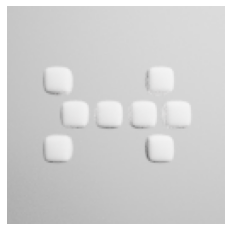

In [5]:
plt.imshow(img)
plt.axis('off')

The renderer also returns an image mask which we visualize here:

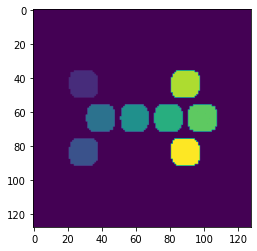

In [6]:
plt.imshow(mask)

In this example, we will render quite a few single images, so we will use another convenience function.

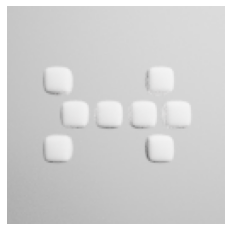

In [7]:
from two4two.plotvis import render_single_param
render_single_param(base_param);

The default SceneParameters always depict a peaky.
One can obtain the same set of default values with another convenience function:

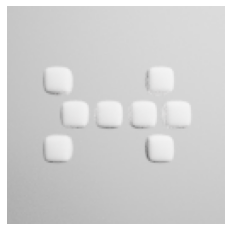

In [8]:
base_peaky = two4two.SceneParameters.default_peaky()
render_single_param(base_peaky);

Similarly a convenience function exist to retrieve a stretchy:

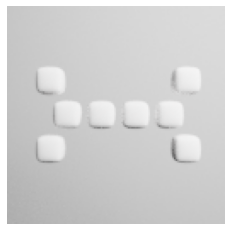

In [9]:
base_stretchy = two4two.SceneParameters.default_stretchy()
render_single_param(base_stretchy);

# Changing Attributes
The attributes of the SceneParameters can be changed manually.
For example, the attribute **fliplr** indicates if the object is flipped vertically (left/right)

In [10]:
fliped_peaky = two4two.SceneParameters()
fliped_peaky.fliplr

False

Since the parameters indicate the object is not flipped, we can change that by setting the attribute manually:

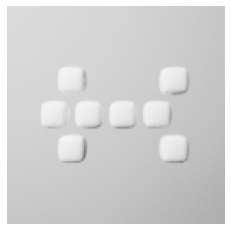

In [11]:
fliped_peaky.fliplr = True
render_single_param(fliped_peaky);

Next, let us look at the attribute of **roation**.
Here we are setting it to its minimum recommended value.

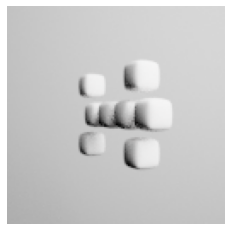

In [12]:
rotating_pitch_peaky = two4two.SceneParameters()
rotating_pitch_peaky.obj_rotation_pitch = two4two.SceneParameters.VALID_VALUES['obj_rotation_pitch'][0]
render_single_param(rotating_pitch_peaky);

After that, we are setting it to its recommended maximum value:

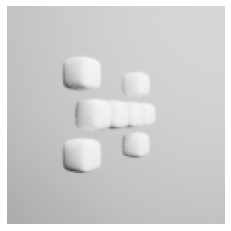

In [13]:
rotating_pitch_peaky.obj_rotation_pitch = two4two.SceneParameters.VALID_VALUES['obj_rotation_pitch'][1]
render_single_param(rotating_pitch_peaky);

It is possible to set attributes outside of the recommended values:

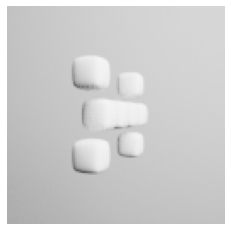

In [14]:
rotating_pitch_peaky.obj_rotation_pitch = 1.2
render_single_param(rotating_pitch_peaky);

To check whether values are with recommended ranges you can use *check_value*:

In [15]:
rotating_pitch_peaky.check_values()

ValueError: Attribute obj_rotation_pitch has value 1.2 but valid values would be in (-1.0471975511965976, 1.0471975511965976).

The following examples will illustrate the other attributes and their corresponding
maximum and minimum recommended values.
The following examples shows the **inclination**.

Please note: For roation_yaw are taking half of the max and min value since the yaw rotation has the range (-PI,+PI), which is a full rotation, resulting in the same image as the original.

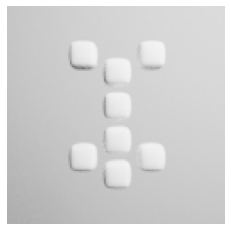

In [16]:
rotating_yaw_peaky = two4two.SceneParameters()
rotating_yaw_peaky.obj_rotation_yaw = 0.5*two4two.SceneParameters.VALID_VALUES['obj_rotation_yaw'][0]
render_single_param(rotating_yaw_peaky);

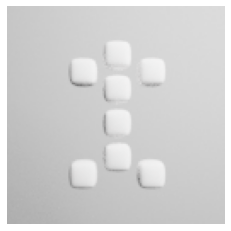

In [17]:
rotating_yaw_peaky.obj_rotation_yaw = 0.5*two4two.SceneParameters.VALID_VALUES['obj_rotation_yaw'][1]
render_single_param(rotating_yaw_peaky);

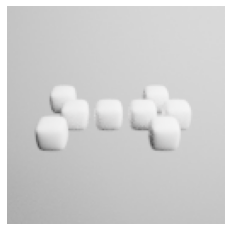

In [18]:
rotating_roll_peaky = two4two.SceneParameters()
rotating_roll_peaky.obj_rotation_roll = two4two.SceneParameters.VALID_VALUES['obj_rotation_roll'][0]
render_single_param(rotating_roll_peaky);

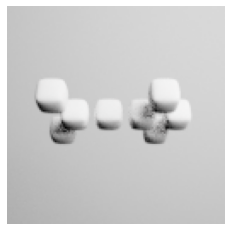

In [19]:
rotating_roll_peaky.obj_rotation_roll = two4two.SceneParameters.VALID_VALUES['obj_rotation_roll'][1]
render_single_param(rotating_roll_peaky);

We can also alter the **position** in the scene:

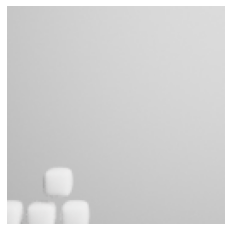

In [20]:
right_down_peaky = two4two.SceneParameters()
right_down_peaky.position_x = two4two.SceneParameters.VALID_VALUES['position_x'][0]
right_down_peaky.position_y = two4two.SceneParameters.VALID_VALUES['position_y'][0]
render_single_param(right_down_peaky);

The 8 building blocks of peaky and stretchy can be altered to be more or less **spherical**:

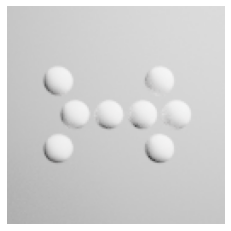

In [21]:
spherical_peaky = two4two.SceneParameters()
spherical_peaky.spherical = two4two.SceneParameters.VALID_VALUES['spherical'][1]
render_single_param(spherical_peaky);

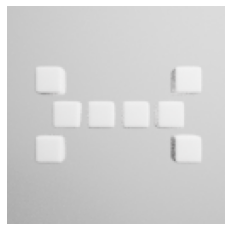

In [22]:
cubic_stretchy = two4two.SceneParameters.default_stretchy()
cubic_stretchy.spherical = two4two.SceneParameters.VALID_VALUES['spherical'][0]
render_single_param(cubic_stretchy);

The objects can take on "postures" with the attribute **bending**:

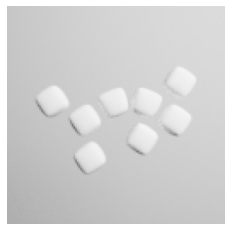

In [23]:
bending_peaky = two4two.SceneParameters()
bending_peaky.bending = two4two.SceneParameters.VALID_VALUES['bending'][0]
bending_peaky.check_values()
render_single_param(bending_peaky);


You can also manually set the RBGA values of the **object color** and the **background color**. However, we recommend using Samplers (which are introduced in the next section) to set the color. The example below illustrates how one can set RBA values:

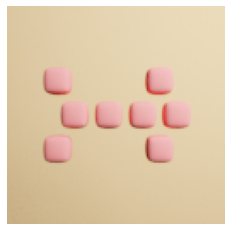

In [24]:
clr_peaky = two4two.SceneParameters()
clr_peaky.obj_color_rgba=(1.0, 0.1764705882352946, 0.1764705882352946, 1.0)
clr_peaky.bg_color_rgba=(0.9921568627450981, 0.5529411764705883, 0.23529411764705882, 1.0)
render_single_param(clr_peaky);

# Sampling large numbers of SceneParameters
In practice, we usually do not create SceneParameters manually. Instead, we use a sampler to sample these attributes from given distributions. The command below creates the default sample provided with this module:

In [25]:
sampler = two4two.Sampler()

Here we use the default provided sample to generate an example.
Try rerunning the cell and see how it changes:

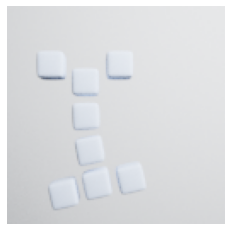

In [26]:
sampled_params = sampler.sample()
render_single_param(sampled_params);

We can create several examples using list comprehension, randomly creating several strechies and peakies. Also, there is a useful helper function that renders these examples in an image grid.

In [27]:
from two4two.plotvis import render_grid

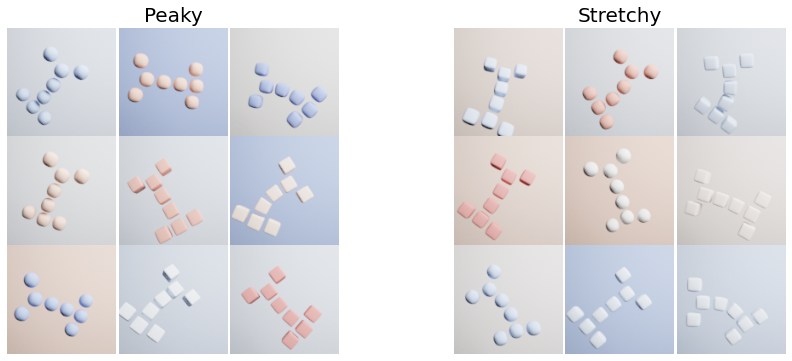

In [28]:
params = [sampler.sample() for i in range(18)]
render_grid(params);

A sampler works by setting attributes using a distribution. Since it does not really produce aesthetically pleasing images when you are sampling rgba values from a distribution, we are sampling canonical values for the color that we then map to a matplotlib color map. This is the reason why SampleParameters stores two types of attributes for colors. In addition, the samplers keep track of the colormap that is used for setting the rgba values.

Background color: The sampled scalar color value of 0.6287724586400867 is in rgba value of (0.4588235294117647, 0.4196078431372549, 0.6941176470588235, 1.0) on the tab20c color map
Object color: The sampled scalar color value of 0.5483052105941837 is in rgba value of (1.0, 0.803921568627451, 0.803921568627451, 1.0) on the seismic color map


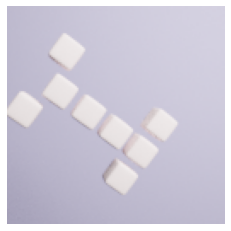

In [29]:
clr_sampler = two4two.Sampler()
clr_sampler.bg_color_map = 'tab20c'
clr_sampler.obj_color_map = 'seismic'
sampled_params = clr_sampler.sample()
print(f"Background color: The sampled scalar color value of {sampled_params.bg_color} is in rgba value of {sampled_params.bg_color_rgba} on the {clr_sampler.bg_color_map} color map" )
print(f"Object color: The sampled scalar color value of {sampled_params.obj_color} is in rgba value of {sampled_params.obj_color_rgba} on the {clr_sampler.obj_color_map} color map" )
render_single_param(sampled_params);

We can also use a sampler to sample individual attributes of SceneParameters.
This is useful to visualize how each attribute is sampled and understanding how one might change the distribution of the sampler to produce different data.
In the example that follows, we define 18 default strechies and 18 default peakies to then only sampler their **color**. We then sort them by their color and visualize them in a grid. The first columns are filled with Peakies, and the last 3 columns with strechies.

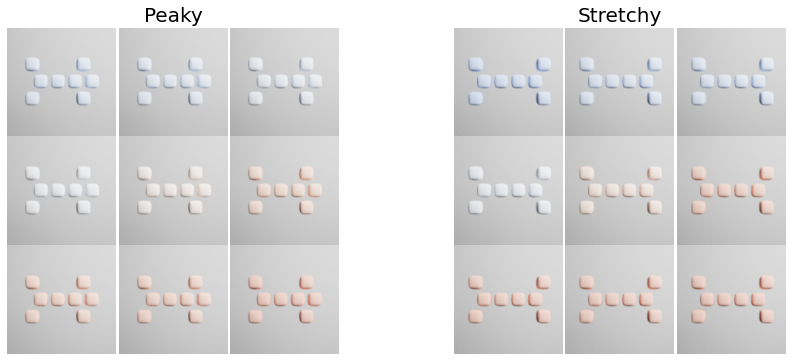

In [30]:
num_images = 18
peakies = [two4two.SceneParameters.default_peaky() for i in range(int(num_images/2))]
strechies = [two4two.SceneParameters.default_stretchy() for i in range(int(num_images/2))]

_ = [sampler.sample_obj_color(params) for params in peakies + strechies]
strechies.sort(key=lambda x: x.obj_color)
peakies.sort(key=lambda x: x.obj_color)
render_grid(peakies + strechies);

In the following example, we repeat this experiment with a different sampler with a **color bias**.
You can see that peakies (left) are more frequently red, and stretchies (rigth) are more frequently blue in the grid.

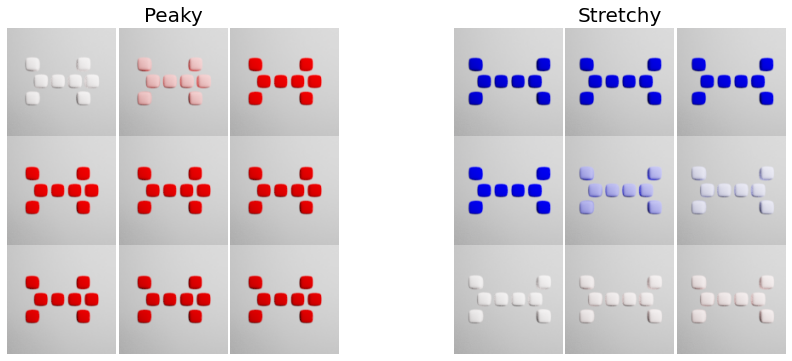

In [31]:
sampler = two4two.ColorBiasedSampler()
_ = [sampler.sample_obj_color(params) for params in peakies + strechies]
strechies.sort(key=lambda x: x.obj_color)
peakies.sort(key=lambda x: x.obj_color)
render_grid(peakies + strechies);

It is much easier to see the color bias when we leave all other attributes constant and order the objects by their color.
Let's see the images our ColorBiasedSampler would create when it is also sampling all other attributes.

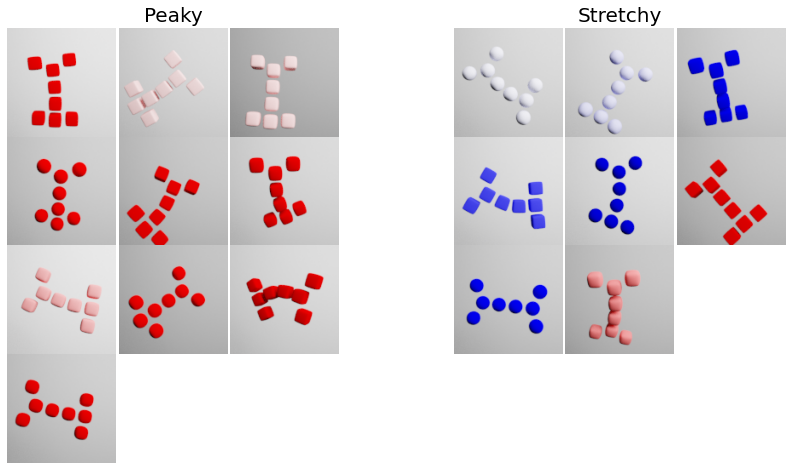

In [32]:
render_grid([sampler.sample() for i in range(num_images)], equal_class_distribution=False);

# More complex biases
We have created an even trickier color bias which only applies to challenging cases. Please see the class documentation of *bias.py* for details on creating more complex biases. The following examples illustrate that it is hard to see this color bias with the plain eye by solely inspecting the training data.

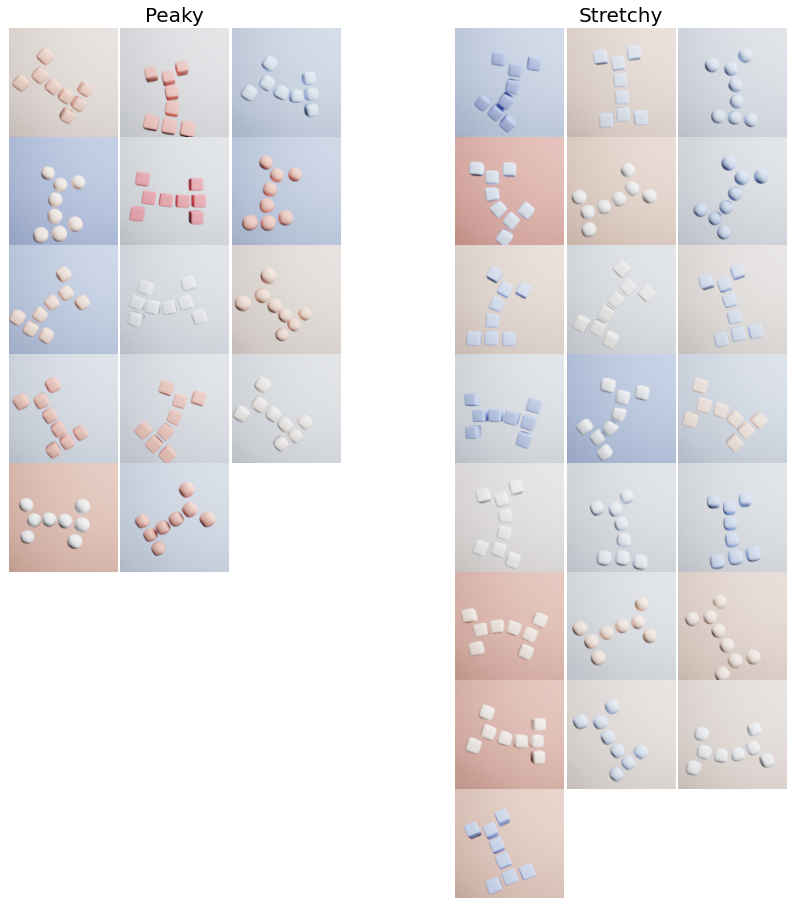

In [33]:
sampler = two4two.bias.MedVarColorSampler()
render_grid([sampler.sample() for i in range(num_images*2)], equal_class_distribution=False);

# Building custom samplers with custom biases
There are two ways one can create **custom samplers**.
For more sophisticated biases, one can implement custom sampling functions - for more details please refer to *bias.py*, which is extensively documented. This notebook does not provide examples for implementing custom functions.
For simple changes, you can set some custom distributions in a given sampler. This what we will illustrate in this notebook.
The following code cell takes the color biased sampler and changes it to also randomly flip objects vertically 50% of the time.
Please note: We are also sampling the arm position because a vertical flip is not visible for stretchy otherwise.

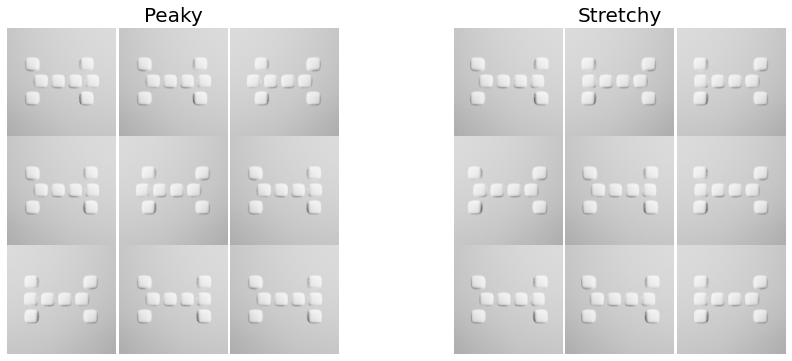

In [34]:
sampler = two4two.Sampler()
sampler.fliplr=two4two.utils.discrete({True: 0.5, False: 0.5})
peakies = [two4two.SceneParameters.default_peaky() for i in range(int(num_images/2))]
strechies = [two4two.SceneParameters.default_stretchy() for i in range(int(num_images/2))]
_ = [sampler.sample_fliplr(params) for params in peakies + strechies]
_ = [sampler.sample_arm_position(params) for params in peakies + strechies]
render_grid(peakies + strechies);

Now let's create our own bias. In the following example, we take the default sampler and visualize how it is sampling
the background color.

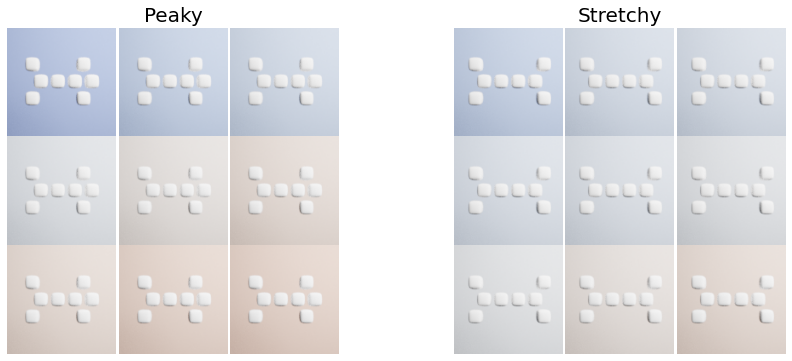

In [35]:
peakies = [two4two.SceneParameters.default_peaky() for i in range(int(num_images/2))]
strechies = [two4two.SceneParameters.default_stretchy() for i in range(int(num_images/2))]
sampler = two4two.Sampler()
_ = [sampler.sample_bg_color(params) for params in peakies + strechies]
strechies.sort(key=lambda x: x.bg_color)
peakies.sort(key=lambda x: x.bg_color)
render_grid(peakies + strechies);

As you can see the backgrounds are quiete similar for both classes (In order to keep this file samll we did not include to many images, please try generating more images when you run this on your own machine).
We will now replace the background distribution with a conditional distribution which is slightly different for peaky and stretchy. For illustration purposes, we only visualize the sampling of the background in these images while leaving all other attributes with their respective default values.

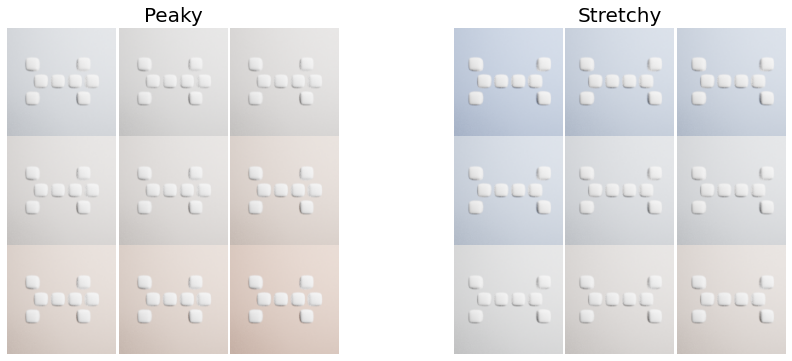

In [36]:
peakies = [two4two.SceneParameters.default_peaky() for i in range(int(num_images/2))]
strechies = [two4two.SceneParameters.default_stretchy() for i in range(int(num_images/2))]
sampler = two4two.Sampler()
sampler.bg_color = {
    'peaky': two4two.utils.truncated_normal(0.8, 0.3, 0.3, 0.85),
    'stretchy': two4two.utils.truncated_normal(0.2, 0.3, 0.15, 0.7)}
_ = [sampler.sample_bg_color(params) for params in peakies + strechies]
strechies.sort(key=lambda x: x.bg_color)
peakies.sort(key=lambda x: x.bg_color)
render_grid(peakies + strechies);

As you saw in the above example, a background bias is noticeable if one orders the images by their background. It becomes less noticeable when the images are not shown in an ordered fashion, as illustrated below.

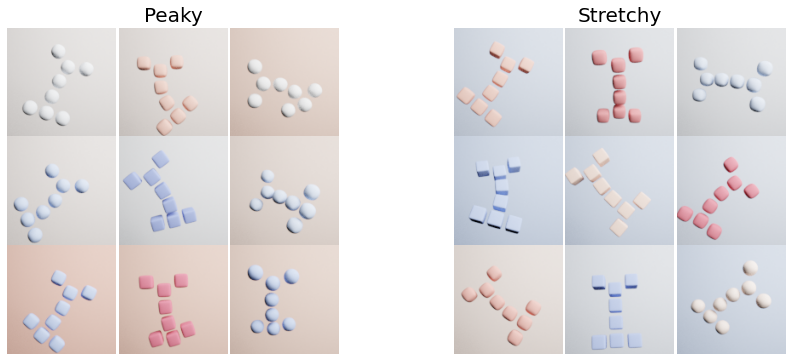

In [37]:
peakies = [sampler.sample(obj_name='peaky') for i in range(int(num_images/2))]
strechies = [sampler.sample(obj_name='stretchy') for i in range(int(num_images/2))]
render_grid(peakies + strechies);

# Increasing classification difficulty
Another option to modify the generated data is to make it more challenging. Here we are modifying how the rotation is sampled:

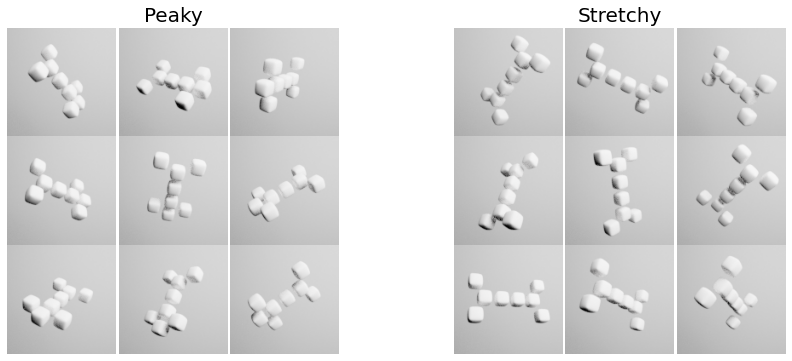

In [38]:
peakies = [two4two.SceneParameters.default_peaky() for i in range(int(num_images/2))]
strechies = [two4two.SceneParameters.default_stretchy() for i in range(int(num_images/2))]
sampler = two4two.Sampler()
sampler.obj_rotation_roll=scipy.stats.uniform(- np.pi / 3, 2 * np.pi / 3)
sampler.obj_rotation_pitch=scipy.stats.uniform(- np.pi / 3, 2 * np.pi / 3)
_ = [sampler.sample_rotation(params) for params in peakies + strechies] 
render_grid(peakies + strechies);

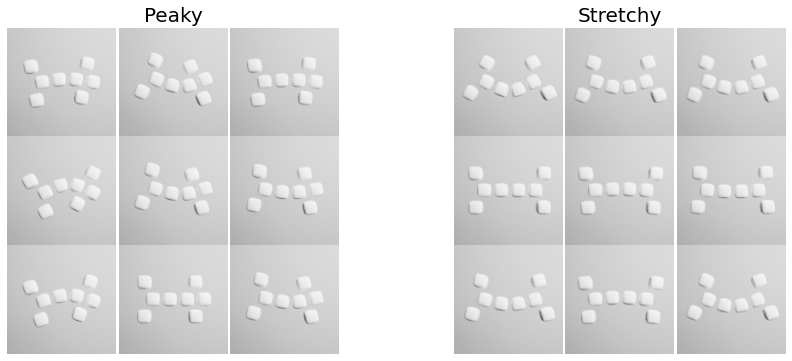

In [39]:
peakies = [two4two.SceneParameters.default_peaky() for i in range(int(num_images/2))]
strechies = [two4two.SceneParameters.default_stretchy() for i in range(int(num_images/2))]
sampler.bending = scipy.stats.uniform(-np.pi / 8, np.pi / 4)
_ = [sampler.sample_bending(params) for params in peakies + strechies] 
render_grid(peakies + strechies);

To visualize the resulting dataset we can once again simply sample all parameters:

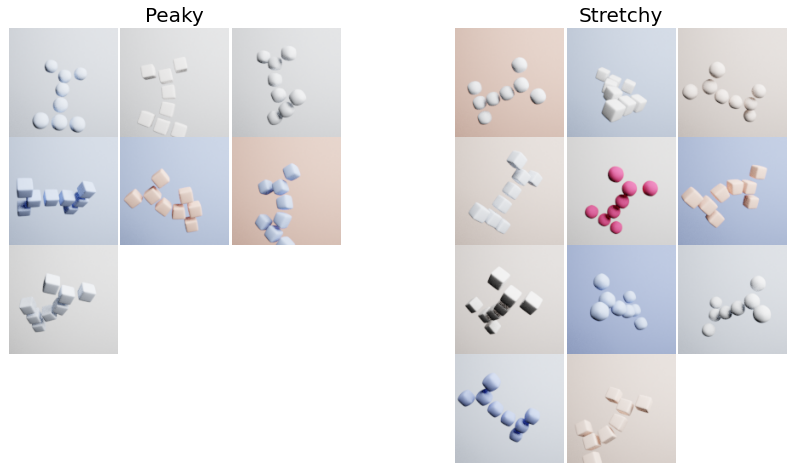

In [40]:
render_grid([sampler.sample() for i in range(num_images)], equal_class_distribution=False);

# Writing large number of images to disk
Once you are happy with the sampler you created, you can use it to generate more data. 

You once again have two options for doing this. If you created your custom class in *bias.py*, you can use the command-line tool functionality *two4two_render_dataset* together with a toml file that specifies how many images should be generated. Please refer to *config/color_spher_bias.toml* as an example.

The second option illustrated in this notebook is to call the render function directly (e.g. from within this notebook). The following cell renderes 100 images with the custom sampler we just created.

In [ ]:
output_dir = "two4two_datasets/higher_variation_bg_bias"
os.makedirs(output_dir, exist_ok=True)
validation_params = [sampler.sample() for i in range(100)]
for _ in two4two.render(validation_params, output_dir=output_dir):
    pass

Please note: While this notebook is excellent for prototyping your own sampler, we recommend that you add your sample to *bias.py* once you are happy with it. If you found a great sampler, we are happy to receive your pull request on Github and add your sampler to the official repository.